# 21.10.20 Lab 2
please note that lab 3, 4 & 5 are also in this notebook

In [1]:
# Summary:
#1. set up the env. import libraries needed (Check notebook file name 'library')
#2. we export the needed files as dataframes using Pandas
#3. let's explore the data using .head(), .shape, info
#4. lets clean the data a bit. rename, map (more research!), str.lower
#6. let's get familiar in using dtype and select 
#7. getting familiar with NA values, dropping, checking etc. null_columns=data.isnull().sum () loc []
#8. check https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html
#8. let's define a function for data cleaning and save it.
#https://www.tutorialspoint.com/python/python_functions.htm


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
data=pd.read_csv('marketing_customer_analysis.csv')

In [4]:
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [5]:
data.shape

(9134, 24)

In [6]:
data.columns=data.columns.str.lower()
data=data.rename(columns={'employmentstatus': 'employment st.', 'number of policies': 'no. of policies'})
data= data.drop(['vehicle size', 'vehicle class'],axis=1)# after this, i should have 22 columns

In [7]:
data.head()

,customer,state,customer lifetime value,response,coverage,education,effective to date,employment st.,gender,income,...,monthly premium auto,months since last claim,months since policy inception,number of open complaints,no. of policies,policy type,policy,renew offer type,sales channel,total claim amount
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879


In [8]:
data.shape

(9134, 22)

In [9]:
data.dtypes

customer                          object
state                             object
customer lifetime value          float64
response                          object
coverage                          object
education                         object
effective to date                 object
employment st.                    object
gender                            object
income                             int64
location code                     object
marital status                    object
monthly premium auto               int64
months since last claim            int64
months since policy inception      int64
number of open complaints          int64
no. of policies                    int64
policy type                       object
policy                            object
renew offer type                  object
sales channel                     object
total claim amount               float64
dtype: object

In [10]:
data.select_dtypes(include='int64')

,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,no. of policies
0,56274,69,32,5,0,1
1,0,94,13,42,0,8
2,48767,108,18,38,0,2
3,0,106,18,65,0,7
4,43836,73,12,44,0,1
...,...,...,...,...,...,...
9129,71941,73,18,89,0,2
9130,21604,79,14,28,0,1
9131,0,85,9,37,3,2
9132,21941,96,34,3,0,3


In [11]:
null_columns=data.isnull().sum ()
null_columns[null_columns > 0].sort_values () # we have no null values


Series([], dtype: int64)

In [12]:
#if we want to make sure we have no null values, we use the above function with = 0
null_columns[null_columns >= 0].sort_values()
# no need to drop any null values in this case

customer                         0
renew offer type                 0
policy                           0
policy type                      0
no. of policies                  0
number of open complaints        0
months since policy inception    0
months since last claim          0
monthly premium auto             0
marital status                   0
location code                    0
income                           0
gender                           0
employment st.                   0
effective to date                0
education                        0
coverage                         0
response                         0
customer lifetime value          0
state                            0
sales channel                    0
total claim amount               0
dtype: int64

In [13]:
#but what if we need to drop na/ missing values?
# data.dropna(axis=1, how='all')- we drop the columns where all values are nan
# data.dropna(axis=1, how='any')- we drop the columns where any values is nan
# data.dropna(axis=0, how='all')- same as above but for rows
#data.dropna(thresh=2)- thresh in the sense keep rows that have at least 2 non-na values

In [14]:
# if we want to replace the nan
data=data.fillna('')

In [15]:
#we noticed above that the date is object, convert > date... why did we use erroes='coerce'? invalid parsing will be set as NaN
data['effective to date'] = pd.to_datetime(data['effective to date'], errors='coerce')

In [16]:
data.dtypes

customer                                 object
state                                    object
customer lifetime value                 float64
response                                 object
coverage                                 object
education                                object
effective to date                datetime64[ns]
employment st.                           object
gender                                   object
income                                    int64
location code                            object
marital status                           object
monthly premium auto                      int64
months since last claim                   int64
months since policy inception             int64
number of open complaints                 int64
no. of policies                           int64
policy type                              object
policy                                   object
renew offer type                         object
sales channel                           

In [17]:
data.head()

,customer,state,customer lifetime value,response,coverage,education,effective to date,employment st.,gender,income,...,monthly premium auto,months since last claim,months since policy inception,number of open complaints,no. of policies,policy type,policy,renew offer type,sales channel,total claim amount
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879


In [18]:
# looking data up by index
data.loc[:10] # index until 10 (including 10)

,customer,state,customer lifetime value,response,coverage,education,effective to date,employment st.,gender,income,...,monthly premium auto,months since last claim,months since policy inception,number of open complaints,no. of policies,policy type,policy,renew offer type,sales channel,total claim amount
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879
5,OC83172,Oregon,8256.297800,Yes,Basic,Bachelor,2011-01-25,Employed,F,62902,...,69,14,94,0,2,Personal Auto,Personal L3,Offer2,Web,159.383042
6,XZ87318,Oregon,5380.898636,Yes,Basic,College,2011-02-24,Employed,F,55350,...,67,0,13,0,9,Corporate Auto,Corporate L3,Offer1,Agent,321.600000
7,CF85061,Arizona,7216.100311,No,Premium,Master,2011-01-18,Unemployed,M,0,...,101,0,68,0,4,Corporate Auto,Corporate L3,Offer1,Agent,363.029680
8,DY87989,Oregon,24127.504020,Yes,Basic,Bachelor,2011-01-26,Medical Leave,M,14072,...,71,13,3,0,2,Corporate Auto,Corporate L3,Offer1,Agent,511.200000
9,BQ94931,Oregon,7388.178085,No,Extended,College,2011-02-17,Employed,F,28812,...,93,17,7,0,8,Special Auto,Special L2,Offer2,Branch,425.527834


In [19]:
def clean_data(data):
    data.columns=[e.lower() for e in data.columns]# we could also replace ('', `_`)
    data=data.rename(columns={'employmentstatus': 'employment st.', 'number of policies': 'no. of policies'})
    #data=data.drop(['vehicle size', 'vehicle class'],axis=1) this would not work, as columns are already dropped
    data['effective to date']=pd.to_datetime(data['effective to date'], errors='coerce')
    data=data.dropna()# incase we want to drop na
    return data
clean_data(data)# to call the function
    
    

,customer,state,customer lifetime value,response,coverage,education,effective to date,employment st.,gender,income,...,monthly premium auto,months since last claim,months since policy inception,number of open complaints,no. of policies,policy type,policy,renew offer type,sales channel,total claim amount
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2011-02-10,Employed,M,71941,...,73,18,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764
9130,PK87824,California,3096.511217,Yes,Extended,College,2011-02-12,Employed,F,21604,...,79,14,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2011-02-06,Unemployed,M,0,...,85,9,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983
9132,UP19263,California,7524.442436,No,Extended,College,2011-02-03,Employed,M,21941,...,96,34,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000


# Lab3

In [20]:
data.describe()

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,no. of policies,total claim amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer                       9134 non-null   object        
 1   state                          9134 non-null   object        
 2   customer lifetime value        9134 non-null   float64       
 3   response                       9134 non-null   object        
 4   coverage                       9134 non-null   object        
 5   education                      9134 non-null   object        
 6   effective to date              9134 non-null   datetime64[ns]
 7   employment st.                 9134 non-null   object        
 8   gender                         9134 non-null   object        
 9   income                         9134 non-null   int64         
 10  location code                  9134 non-null   object        
 11  marital status   

In [22]:
data.dtypes

customer                                 object
state                                    object
customer lifetime value                 float64
response                                 object
coverage                                 object
education                                object
effective to date                datetime64[ns]
employment st.                           object
gender                                   object
income                                    int64
location code                            object
marital status                           object
monthly premium auto                      int64
months since last claim                   int64
months since policy inception             int64
number of open complaints                 int64
no. of policies                           int64
policy type                              object
policy                                   object
renew offer type                         object
sales channel                           

In [23]:
data.head()

,customer,state,customer lifetime value,response,coverage,education,effective to date,employment st.,gender,income,...,monthly premium auto,months since last claim,months since policy inception,number of open complaints,no. of policies,policy type,policy,renew offer type,sales channel,total claim amount
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879


<AxesSubplot:>

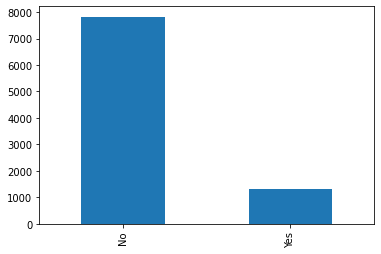

In [24]:
#total number of responses, let's use matplotlib
data['response'].value_counts().plot(kind='bar')

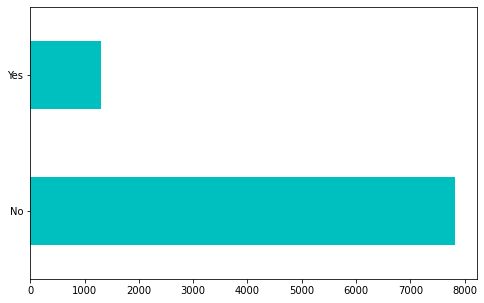

In [25]:
# let's give it a variable and switch between responses and count. maybe also play a bit with the size and colour
data_response=data['response'].value_counts().plot(kind='barh', figsize=(8,5), color="c")

<AxesSubplot:xlabel='response', ylabel='count'>

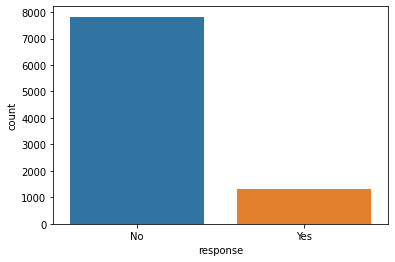

In [26]:
#seaborn
sns.countplot(x='response', data=data)

In [27]:
#descriptive statistics. This can be useful for surveys and multiple choice questions
data['response'].value_counts()

No     7826
Yes    1308
Name: response, dtype: int64

In [28]:
#what if i want to represent them as percentages? easy, we normalize ;)
data['response'].value_counts(normalize=True)


No     0.856799
Yes    0.143201
Name: response, dtype: float64

<AxesSubplot:xlabel='sales channel', ylabel='count'>

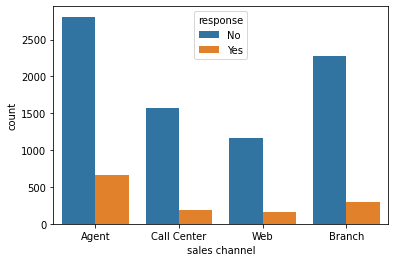

In [29]:
# the response rate by the sales channel
sns.countplot(x='sales channel', hue= 'response', data=data)

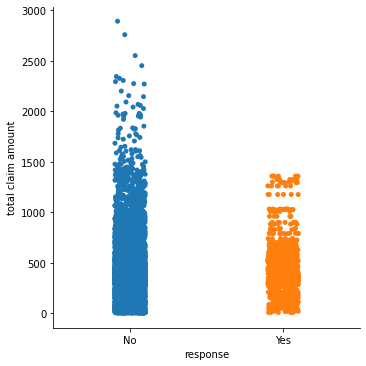

In [30]:
#the response rate by the total calim amount. I honestly don't see any relationship or analysis here 
# But to be fair, this is the only plot that could kinda provide something bearable to look at. Open for any 
#suggestions though :)
sns.catplot(x="response", y="total claim amount", order=["No", "Yes"], data=data)

<AxesSubplot:xlabel='response', ylabel='income'>

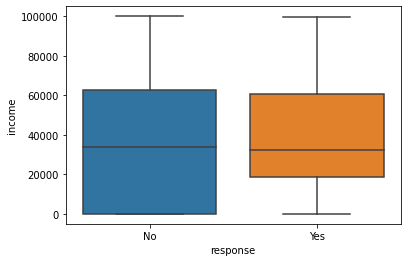

In [31]:
#Show a plot of the response rate by income.
sns.boxplot(x='response',y='income',data=data)

In [32]:
data.describe ()

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,no. of policies,total claim amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


# lab 4

In [33]:
# import libraries, in addition to the ones mentioned above
# histogram plot
from numpy.random import seed
from numpy.random import randn
from matplotlib import pyplot
from numpy.random import seed
from numpy.random import randn
from matplotlib import pyplot
import scipy.stats as stats

In [34]:
data.head()

,customer,state,customer lifetime value,response,coverage,education,effective to date,employment st.,gender,income,...,monthly premium auto,months since last claim,months since policy inception,number of open complaints,no. of policies,policy type,policy,renew offer type,sales channel,total claim amount
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879


In [35]:
data.dtypes

customer                                 object
state                                    object
customer lifetime value                 float64
response                                 object
coverage                                 object
education                                object
effective to date                datetime64[ns]
employment st.                           object
gender                                   object
income                                    int64
location code                            object
marital status                           object
monthly premium auto                      int64
months since last claim                   int64
months since policy inception             int64
number of open complaints                 int64
no. of policies                           int64
policy type                              object
policy                                   object
renew offer type                         object
sales channel                           

In [36]:
numerical= ['float64', 'int64']
categoricals= ['object']

In [37]:
new_data1 = data.select_dtypes(include=numerical)
new_data1.dtypes

customer lifetime value          float64
income                             int64
monthly premium auto               int64
months since last claim            int64
months since policy inception      int64
number of open complaints          int64
no. of policies                    int64
total claim amount               float64
dtype: object

In [38]:
new_data2 = data.select_dtypes(include=categoricals)
new_data2.dtypes

customer            object
state               object
response            object
coverage            object
education           object
employment st.      object
gender              object
location code       object
marital status      object
policy type         object
policy              object
renew offer type    object
sales channel       object
dtype: object

In [39]:
# or formula to get only numeric data
numeric=data._get_numeric_data()

In [40]:
numeric.head()

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,no. of policies,total claim amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


In [41]:
# normally before we start analyzing data, we should understand how variables are distributed
# why? because we might need to do transformation before analysis
# we want to know whether our data follow a normal distribution or not (skewed)
# we can identify outliers
# is our data being sampled from a normal distribution?
# how to check normality? Frequency distribution, QQPlot,Pearson?

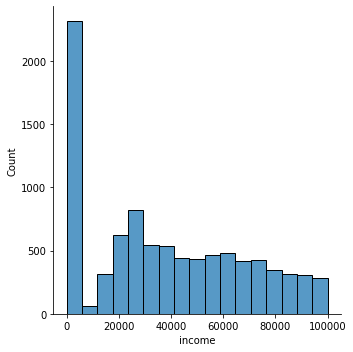

In [42]:
sns.displot(new_data1, x="income")
plt.show()

/Users/najwasaqal/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


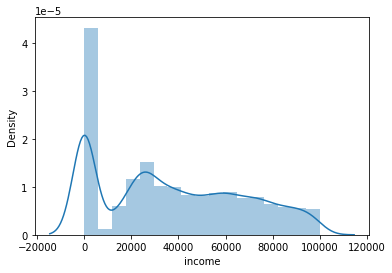

In [43]:
sns.distplot(new_data1.income)
plt.show()

In [44]:
#the warnings are annoying,get rid of them!
import warnings
warnings.filterwarnings("ignore")

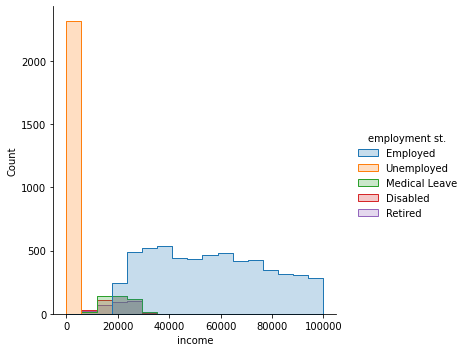

In [45]:
# conditioning on other variables
sns.displot(data, x="income", hue="employment st.", element="step")

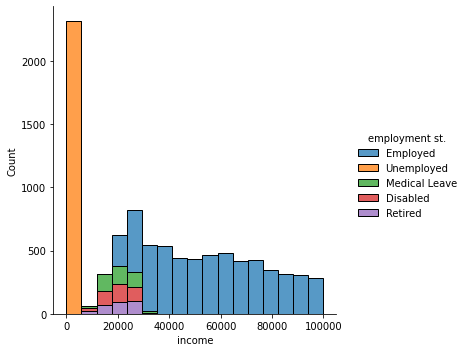

In [46]:
#trying out different alternatives
sns.displot(data, x="income", hue="employment st.", multiple="stack")

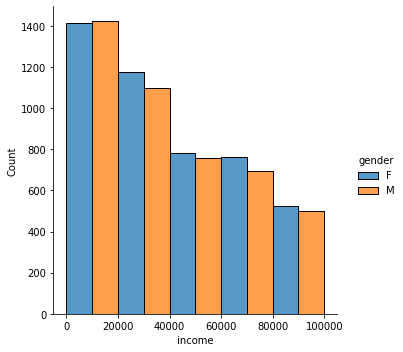

In [47]:
# playing with bins
sns.displot(data, x="income", hue="gender", multiple="dodge", bins= 5)
plt.show()

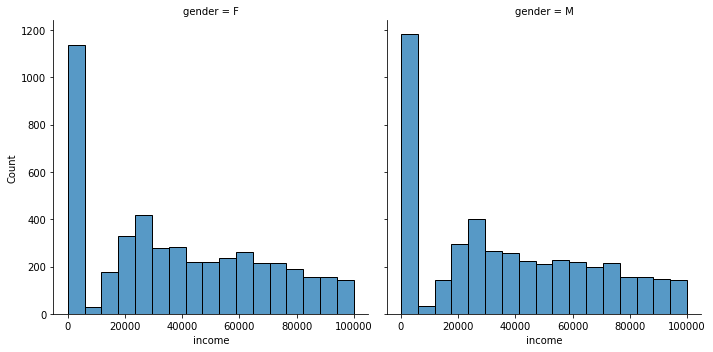

In [48]:
sns.displot(data, x="income", col="gender", multiple="dodge")

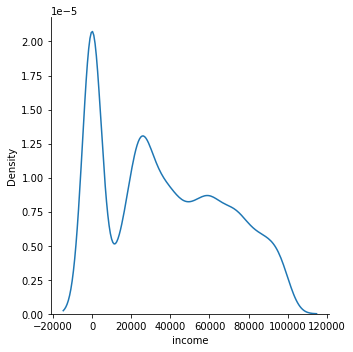

In [49]:
sns.displot(data, x="income", kind="kde")

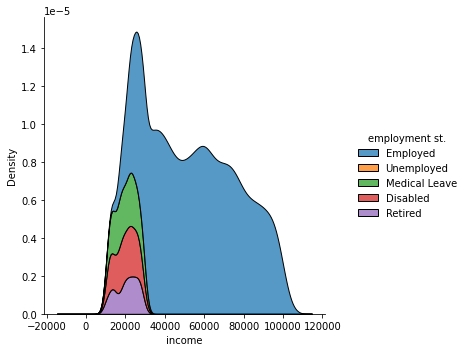

In [50]:
# probability density
sns.displot(data, x="income", hue="employment st.", kind="kde", multiple="stack")

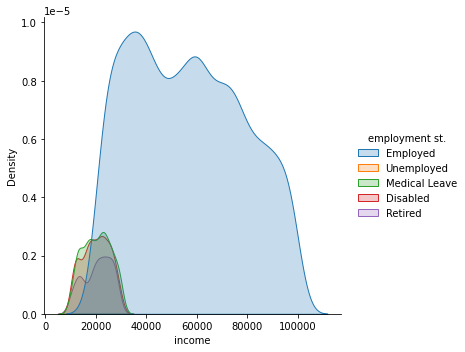

In [51]:
sns.displot(data, x="income", hue="employment st.", kind="kde", fill=True)

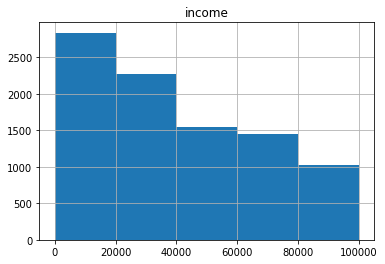

In [52]:
#using matplotlib
data.hist(column='income', bins = 5)
plt.show()

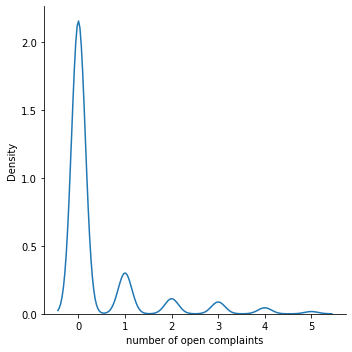

In [53]:
sns.displot(data, x="number of open complaints", kind="kde")

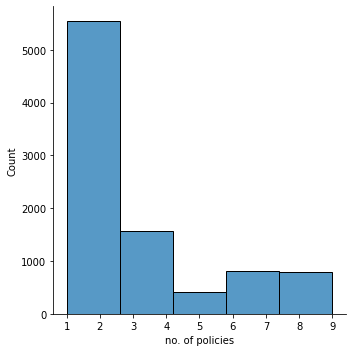

In [54]:
sns.displot(data, x="no. of policies", multiple="dodge", bins= 5)
plt.show()

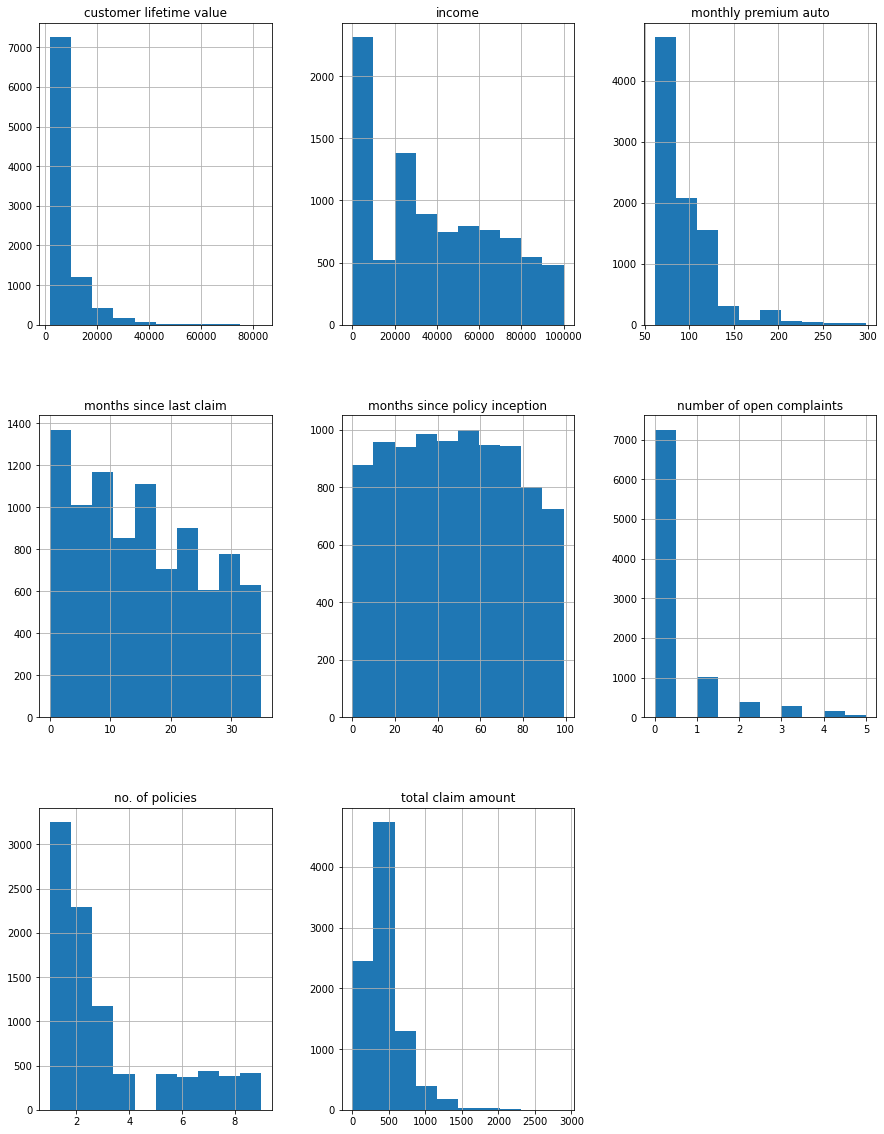

In [55]:
# for all numerical data to answer the question in the lab 
data.hist(figsize = (15,20))
plt.show()

In [56]:
# checking multicollinearity / correlation between variables - linear dependance
# how to check correlations among columns quickly? by visulizing the correlation matrix heatmap. let's do it
#in 3 steps: 1.create correlation matrix, 2.create mask to hide the upper or lower triangle, 3. create heatmap
data.head()

,customer,state,customer lifetime value,response,coverage,education,effective to date,employment st.,gender,income,...,monthly premium auto,months since last claim,months since policy inception,number of open complaints,no. of policies,policy type,policy,renew offer type,sales channel,total claim amount
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879


In [57]:
corr=data.corr()
mask = np.zeros_like(corr) # returns an array of zeros with the same shape?
mask[np.triu_indices_from(mask)]= True # returns the indices for the upper triangle of the array.  
#.tril() returns the upper triangle

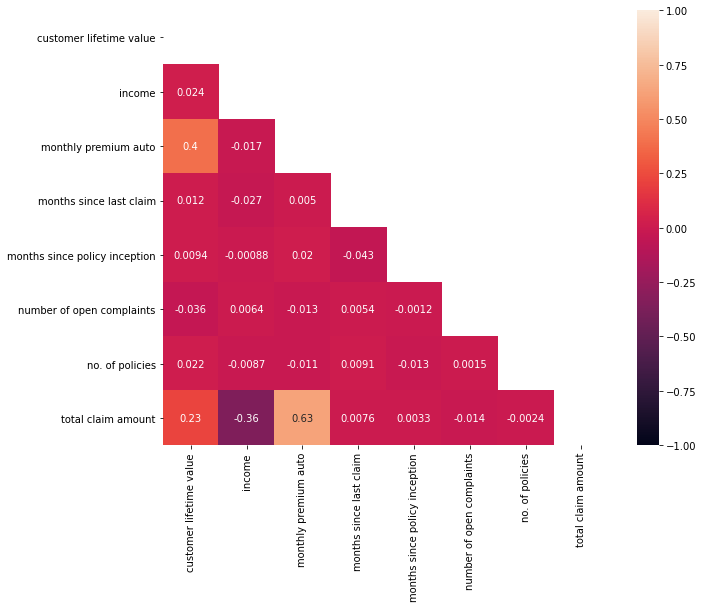

In [58]:
f, ax = plt.subplots(figsize=(10, 8))
c=sns.heatmap(corr, mask=mask,vmin = -1, vmax = 1, annot= True) # adjusting the bar measurment

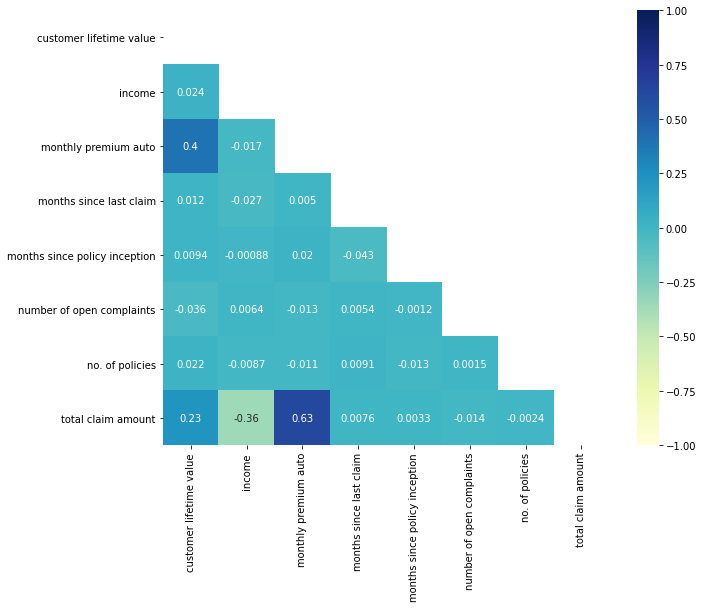

In [59]:
# testing the new version of seaborn (.11)
f, ax = plt.subplots(figsize=(10, 8))
c=sns.heatmap(corr, mask=mask,vmin = -1, vmax = 1, annot= True, cmap="YlGnBu") # adjusting the bar measurmebt

In [60]:
# interpretaion: correlation ranges from -1 to +1. the closer to 1, the higher positive correlation. close to 0
# indicates no linear trend. the closer to -1, the higher negative correlation.  
# the larger the number and darker the colour, the higher the correlation 
# from the heatmap, i can tell there r no correlation greater then .9

# LAB 5

In [61]:
#X-Y split. What shall we do here? I guess, we need all libraries related to sklearn/ machine learning
# prior to the process of building a model, we need to split data into 2 sections or portions: one to develop a
# predictive model and another to evaluate so to say the performance of the created model. 
# make sure we have scikit-learn in the env.
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
# Normalize the data attributes 
from sklearn.datasets import load_iris
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler

In [62]:
# our columns are usually the predictor variables or features (indep. variables). 
# and the last column could be our outcome variable which apparently should be the Y. Rows represent our sample
# in our case, y is the total claim amount. The rest should be X
# so do we need to fit models to data? in order to achieve this we need first to split our data, i.e randomly 
# sample from our df. a subset of the df (test set and train set)
# we need to avoid overfitting or underfitting? 

In [63]:
data.head()

,customer,state,customer lifetime value,response,coverage,education,effective to date,employment st.,gender,income,...,monthly premium auto,months since last claim,months since policy inception,number of open complaints,no. of policies,policy type,policy,renew offer type,sales channel,total claim amount
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879


In [64]:
data.shape

(9134, 22)

In [65]:
data= data.drop(['customer', 'effective to date', 'renew offer type'],axis=1)

In [66]:
data.shape

(9134, 19)

In [88]:
# x all features columns except for the outcome variable'total calim amount', which is our y
y=data["total claim amount"]
x=data.drop('total claim amount', axis=1)
#first try, i deleted the total claim amount before assigning y! always assign y first!

In [92]:
y #outcome variable

0        384.811147
1       1131.464935
2        566.472247
3        529.881344
4        138.130879
           ...     
9129     198.234764
9130     379.200000
9131     790.784983
9132     691.200000
9133     369.600000
Name: total claim amount, Length: 9134, dtype: float64

In [102]:
x.head() #predictor variables

,state,customer lifetime value,response,coverage,education,employment st.,gender,income,location code,marital status,monthly premium auto,months since last claim,months since policy inception,number of open complaints,no. of policies,policy type,policy,sales channel
0,Washington,2763.519279,No,Basic,Bachelor,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Agent
1,Arizona,6979.535903,No,Extended,Bachelor,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Agent
2,Nevada,12887.431650,No,Premium,Bachelor,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Agent
3,California,7645.861827,No,Basic,Bachelor,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Call Center
4,Washington,2813.692575,No,Basic,Bachelor,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Agent


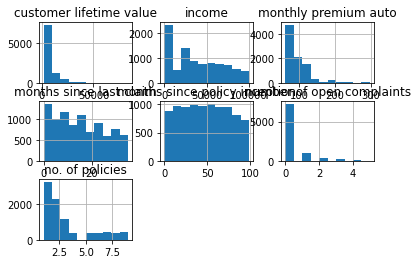

In [103]:
x.hist()
plt.show()

In [77]:
x_numeric.shape

(9134, 7)

In [78]:
x_numeric.dtypes

customer lifetime value          float64
income                             int64
monthly premium auto               int64
months since last claim            int64
months since policy inception      int64
number of open complaints          int64
no. of policies                    int64
dtype: object

In [80]:
# categorical variables
x_categ=x.drop(columns=x_numeric.columns)
print (x_categ.shape)
x_categ.dtypes

(9134, 11)


state             object
response          object
coverage          object
education         object
employment st.    object
gender            object
location code     object
marital status    object
policy type       object
policy            object
sales channel     object
dtype: object

In [85]:
#ready to use some of sklearn functions to preprocess/transform
transformer = Normalizer().fit(x_numeric)
x_normalized = transformer.transform(x_numeric)
print(x_normalized.shape)

(9134, 7)


In [94]:
#standardization method
transformer = StandardScaler().fit(x_numeric)
x_standardized = transformer.transform(x_numeric)
print(x_standardized.shape)

(9134, 7)


In [ ]:
#Verify that the mean of each feature (column) is 0
#x_mean=x.mean(axis=0)
#Verify that the std of each feature (column) is 1
#x_std=X.std(axis=0)

In [95]:
#calculate mean and std to transformed columns/ features
x_standardized.mean(axis=0)

array([ 3.81175761e-17,  7.46793329e-17, -1.48775233e-16,  4.47298087e-17,
        1.00350354e-16,  7.62351523e-17, -1.36134201e-17])

In [96]:
x_standardized.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1.])

In [104]:
# for later, define a plot to show the difference! 

In [98]:
(x_numeric-x_standardized).sum().sum()

418538622.2985463